In [1]:
from adaptive_dg.models import DomainGeneralizer, DGHParams
from adaptive_dg.datasets import ColoredMNIST

import numpy as np
import matplotlib.pyplot as plt

In [2]:
DGHParams.required_parameters()

{'max_epochs': int | None,
 'batch_size': int,
 'dataset': lightning_trainable.hparams.types.choice.Choice('ColoredMNIST', 'RotatedMNIST', 'VLCS', 'PACS', 'Camelyon17', 'FMoWYear', 'FMoWRegion', 'OfficeHome', 'TerraIncognita', 'ProDASCondSatisfied', 'Kang'),
 'id_domains': list,
 'ood_domains': list}

In [3]:
hparams = dict(
    max_epochs=1,
    batch_size=32,
    dataset="ColoredMNIST",
    id_domains=["L", "M"],
    ood_domains=["H"],
)
hparams = DGHParams(**hparams)

In [4]:
dataset = ColoredMNIST(root="data", download=False)
img, label = dataset[0]

img.shape, label.shape

(torch.Size([3, 28, 28]), torch.Size([2]))

In [5]:
model = DomainGeneralizer(hparams)

Found existing ColoredMNIST dataset in data, skipping download.


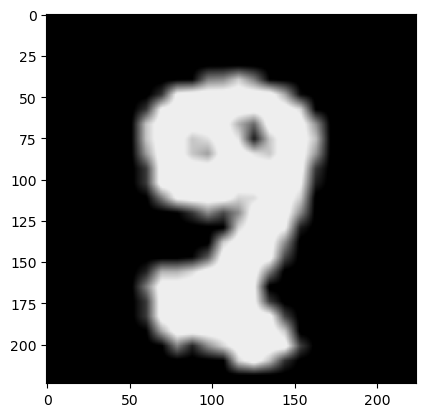

In [6]:
dataset = model.train_data.domain(1)
img, img_set, label, domain = dataset[2]

img = img.movedim(0, -1)

plt.imshow(img)
plt.show()